# <center> Recommendation System on Movie Lens Dataset

## Reading Data

In [1]:
# Jupyter Notebook with Matplotlib Inline
%matplotlib notebook

# Importing necessary modules
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from subprocess import check_output

In [2]:
# Set height, width, maximum rows and columns
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

height has been deprecated.



In [3]:
# List of files in the data directory
print(os.listdir("data/"))

['data', 'desktop.ini', 'ml-100k.zip', 'Read Me.txt', 'u.data', 'u.genre', 'u.info', 'u.item', 'u.occupation', 'u.user']


In [4]:
# Reading ratings data
rating_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('data/u.data', sep='\t', names = rating_cols) 

In [5]:
print(ratings.shape)
ratings.head(5)

(100000, 4)


,user_id,movie_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [6]:
# Reading genre data
genre_cols = ['genre', 'genre_id']
genres = pd.read_csv('data/u.genre', sep='|', names = genre_cols) 

In [7]:
print(genres.shape)
genres.head(5)

(19, 2)


,genre,genre_id
0,unknown,0
1,Action,1
2,Adventure,2
3,Animation,3
4,Children's,4


In [10]:
# Reading movies data
movies_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url','unknown', 'Action', 'Adventure',
'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy','Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']
movies = pd.read_csv('data/u.item', sep = '|', names = movies_cols,  encoding='latin-1')

In [11]:
print(movies.shape)
movies.head(2).transpose()

(1682, 24)


,0,1
movie_id,1,2
title,Toy Story (1995),GoldenEye (1995)
release_date,01-Jan-1995,01-Jan-1995
video_release_date,NaN,NaN
imdb_url,http://us.imdb.com/M/title-exact?Toy%20Story%2...,http://us.imdb.com/M/title-exact?GoldenEye%20(...
unknown,0,0
Action,0,1
Adventure,0,1
Animation,1,0
Children's,1,0


In [12]:
# Reading users data
user_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
users = pd.read_csv('data/u.user', sep='|', names = user_cols) 

In [13]:
print(users.shape)
users.head()

(943, 5)


,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [14]:
# Shape of all the data
for i in [ratings, genres, movies, users]:
    print(i.shape)

(100000, 4)
(19, 2)
(3, 2)
(1682, 24)
(943, 5)


In [15]:
movies.head(3).transpose()

,0,1,2
movie_id,1,2,3
title,Toy Story (1995),GoldenEye (1995),Four Rooms (1995)
release_date,01-Jan-1995,01-Jan-1995,01-Jan-1995
video_release_date,NaN,NaN,NaN
imdb_url,http://us.imdb.com/M/title-exact?Toy%20Story%2...,http://us.imdb.com/M/title-exact?GoldenEye%20(...,http://us.imdb.com/M/title-exact?Four%20Rooms%...
unknown,0,0,0
Action,0,1,0
Adventure,0,1,0
Animation,1,0,0
Children's,1,0,0


In [16]:
ratings.head(3).transpose()

,0,1,2
user_id,196,186,22
movie_id,242,302,377
rating,3,3,1
timestamp,881250949,891717742,878887116


In [17]:
users.head(3).transpose()

,0,1,2
user_id,1,2,3
age,24,53,23
sex,M,F,M
occupation,technician,other,writer
zip_code,85711,94043,32067


## Merging Data

In [43]:
# Merging ratings and movies
z = ratings.merge(movies, on = 'movie_id', how = "inner")

In [44]:
z.columns

Index(['user_id', 'movie_id', 'rating', 'timestamp', 'title', 'release_date', 'video_release_date', 'imdb_url', 'unknown', 'Action', 'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], dtype='object')

In [45]:
# Merge combined data and users
zz = users.merge(z, on = 'user_id', how = "inner")

In [21]:
# New combined data
zz.head(3).transpose()

,0,1,2
user_id,1,1,1
age,24,24,24
sex,M,M,M
occupation,technician,technician,technician
zip_code,85711,85711,85711
movie_id,242,51,265
rating,5,4,4
timestamp,889751633,878543275,878542441
title,Kolya (1996),Legends of the Fall (1994),"Hunt for Red October, The (1990)"
release_date,24-Jan-1997,01-Jan-1994,01-Jan-1990


In [22]:
zz.shape

(100000, 31)

## Data Pre-Processing

In [48]:
# Format 'title' i.e. remove 'year' from title
zz['title'] = zz['title'].astype(str).str[:-7]

In [50]:
zz.title.head()

0                        Kolya
1          Legends of the Fall
2    Hunt for Red October, The
3      Remains of the Day, The
4                 Men in Black
Name: title, dtype: object

## Day 3 - Data Merge Version 2

In [23]:
u_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
r_cols = ['user_id', 'movie_id', 'rating', 'timestamp']
m_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
# movies_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url','unknown', 'Action', 'Adventure',
# 'Animation', 'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy','Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

In [24]:
users_1 = pd.read_csv("data/u.user",sep='|',names=u_cols)
ratings_1 = pd.read_csv('data/u.data',sep='\t', names=r_cols)
movies_1 = pd.read_csv('data/u.item', sep='|', names=m_cols, usecols=range(5), encoding='latin-1')
movielens=pd.merge(users_1 , ratings_1)
movielens=pd.merge(movielens,movies_1)
movielens.head(3)

,user_id,age,sex,occupation,zip_code,movie_id,rating,timestamp,title,release_date,video_release_date,imdb_url
0,1,24,M,technician,85711,61,4,878542420,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
1,13,47,M,educator,29206,61,4,882140552,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...
2,18,35,F,other,37212,61,4,880130803,Three Colors: White (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Trzy%20kolory...


## EDA 

In [25]:
zz.head()

,user_id,age,sex,occupation,zip_code,movie_id,rating,timestamp,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,24,M,technician,85711,242,5,889751633,Kolya (1996),24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,24,M,technician,85711,51,4,878543275,Legends of the Fall (1994),01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1
2,1,24,M,technician,85711,265,4,878542441,"Hunt for Red October, The (1990)",01-Jan-1990,NaN,http://us.imdb.com/M/title-exact?Hunt+for+Red+...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,24,M,technician,85711,86,5,878543541,"Remains of the Day, The (1993)",01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Remains%20of%...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,24,M,technician,85711,257,4,874965954,Men in Black (1997),04-Jul-1997,NaN,http://us.imdb.com/M/title-exact?Men+in+Black+...,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


<div class="alert alert-warning">
  <strong>user_id</strong> 
</div>

In [32]:
# Total number of users
len(zz.user_id.unique())

943

<div class="alert alert-warning">
  <strong>age</strong> 
</div>

In [89]:
np.sqrt(np.sqrt(len(zz)))

17.782794100389228

<IPython.core.display.Javascript object>


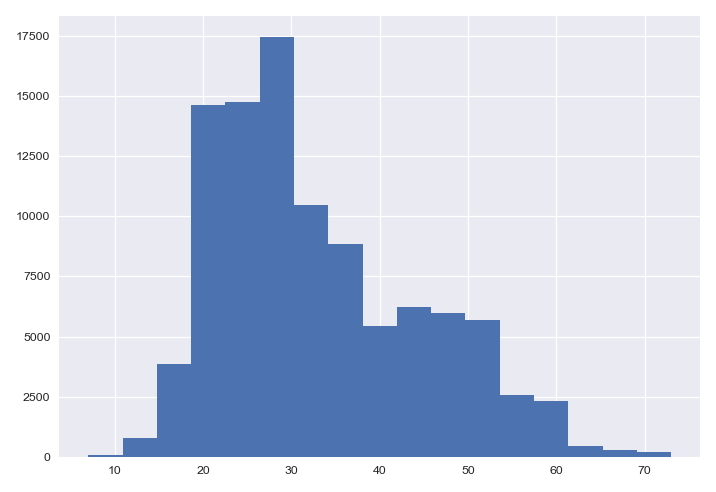

In [90]:
# Plotting distribution of 'age' with sqrt(sqrt(100000)) bins
zz['age'].hist(bins = int(np.sqrt(np.sqrt(len(zz)))))

**Interpretation:** We see from the above graph that distribution is slightly skewed to the right and the data is majorly distributed between 20 and 40.

<div class="alert alert-warning">
  <strong>gender</strong> 
</div>

In [92]:
# Number of observations by gender 
zz.sex.value_counts()

M    74260
F    25740
Name: sex, dtype: int64

** Interpretation:** From the above table of value counts, it is apparent that the data is highly comprised of 'Males' than 'Females' 

<div class="alert alert-warning">
  <strong>occupation</strong> 
</div>

In [93]:
# Number of observations by gender 
zz.occupation.value_counts()

student          21957
other            10663
educator          9442
engineer          8175
programmer        7801
administrator     7479
writer            5536
librarian         5273
technician        3506
executive         3403
healthcare        2804
artist            2308
entertainment     2095
scientist         2058
marketing         1950
retired           1609
lawyer            1345
none               901
salesman           856
doctor             540
homemaker          299
Name: occupation, dtype: int64

<div class="alert alert-danger">

<strong>How can I categorize the above jobs? Not sure which category each of they belong to.</strong> <br>
PS: I have come across an article that says, to acheive the best results; a maximum of 4-7 categories per feature. 

</div>

<div class="alert alert-warning">
  <strong>movie_id</strong> 
</div>

In [94]:
# Total number of movies
len(zz.movie_id.unique())

1682

<div class="alert alert-warning">
  <strong>rating</strong> 
</div>

<IPython.core.display.Javascript object>


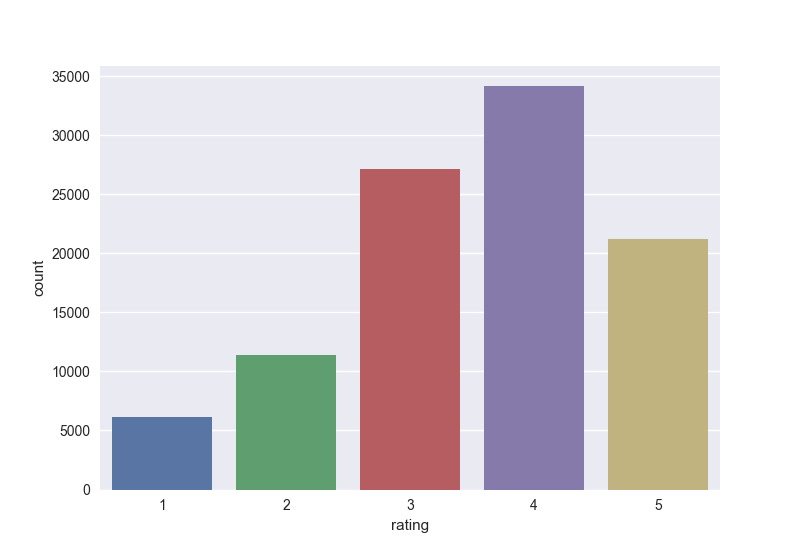

In [66]:
# Ratings and their respective counts
sns.countplot(x = zz.rating, data = zz)

**Interpretation:** From the above plot, it is apparent that most of the user ratings were either 3 or 4.

<div class="alert alert-warning">
  <strong>title</strong> 
</div>

In [64]:
top_movies = zz.groupby('title').size().sort_values(ascending = False)[:10]

In [191]:
top_movies

title
Star Wars                 583
Contact                   509
Fargo                     508
Return of the Jedi        507
Liar Liar                 485
English Patient, The      481
Scream                    478
Toy Story                 452
Air Force One             431
Independence Day (ID4)    429
dtype: int64

In [76]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

In [192]:
top_movies.plot(kind = 'barh')

### Most rated movies (count)

<IPython.core.display.Javascript object>


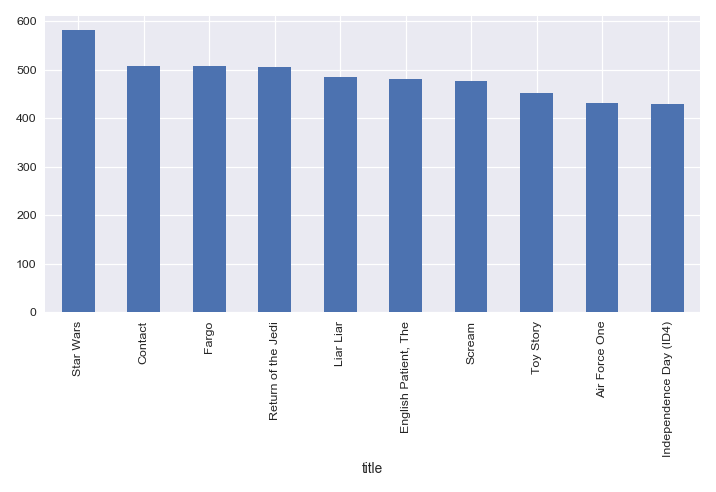

In [195]:
top_movies.plot(kind = 'bar')

### High and Low rated movies (rating)

In [176]:
dff = zz[['movie_id', 'title', 'rating']]
dff.head()

,movie_id,title,rating
0,242,Kolya,5
1,51,Legends of the Fall,4
2,265,"Hunt for Red October, The",4
3,86,"Remains of the Day, The",5
4,257,Men in Black,4


In [180]:
dff_1 = dff.groupby('title').agg([np.mean, np.size])

In [182]:
dff_1.shape

(1659, 4)

In [181]:
dff_1.head()

movie_id         rating     
                       mean size      mean size
title                                          
                      267.0    9  3.444444    9
'Til There Was You   1300.0    9  2.333333    9
1-900                1353.0    5  2.600000    5
101 Dalmatians        225.0  109  2.908257  109
12 Angry Men          178.0  125  4.344000  125

In [184]:
dff_1.drop('movie_id', axis = 1)

rating     
                                                        mean size
title                                                            
                                                    3.444444    9
'Til There Was You                                  2.333333    9
1-900                                               2.600000    5
101 Dalmatians                                      2.908257  109
12 Angry Men                                        4.344000  125
187                                                 3.024390   41
2 Days in the Valley                                3.225806   93
20,000 Leagues Under the Sea                        3.500000   72
2001: A Space Odyssey                               3.969112  259
3 Ninjas: High Noon At Mega Mountain                1.000000    5
39 Steps, The                                       4.050847   59
8 1/2                                               3.815789   38
8 Heads in a Duffel Bag                             3.250000    4
8 Seconds                                           3.750000    4
A Chef in Love                                      4.125000    8
Above the Rim                                       3.000000    5
Absolute Power                                      3.370079  127
Abyss, The                                          3.589404  151
Ace Ventura: Pet Detective                          3.048544  103
Ace Ventura: When Nature Calls                      2.675676   37
Across the Sea of Time                              2.750000    4
Addams Family Values                                2.816092   87
Addicted to Love                                    3.166667   54
Addiction, The                                      2.181818   11
Adventures of Pinocchio, The                        3.051282   39
Adventures of Priscilla, Queen of the Desert, The   3.594595  111
Adventures of Robin Hood, The                       3.791045   67
Affair to Remember, An                              4.192308   26
African Queen, The                                  4.184211  152
Afterglow                                           3.111111   18
Age of Innocence, The                               3.384615   65
Aiqing wansui                                       5.000000    1
Air Bud                                             2.558140   43
Air Force One                                       3.631090  431
Air Up There, The                                   2.812500   16
Airheads                                            2.343750   32
Akira                                               3.380000   50
Aladdin                                             3.812785  219
Aladdin and the King of Thieves                     2.846154   26
Alaska                                              2.692308   13
Albino Alligator                                    2.500000    6
Alice in Wonderland                                 3.666667   81
Alien                                               4.034364  291
Alien 3                                             2.830000  100
Alien: Resurrection                                 3.096774  124
Aliens                                              3.947183  284
All About Eve                                       4.045455   66
All Dogs Go to Heaven 2                             1.866667   15
All Over Me                                         3.000000    3
All Things Fair                                     3.000000    1
Alphaville                                          3.333333   12
Amadeus                                             4.163043  276
Amateur                                             3.166667   18
Amazing Panda Adventure, The                        2.800000   10
American Buffalo                                    2.636364   11
American Dream                                      2.500000    2
American President, The                             3.628049  164
American Strays                                     2.000000    2
American Werewolf in London,

<IPython.core.display.Javascript object>


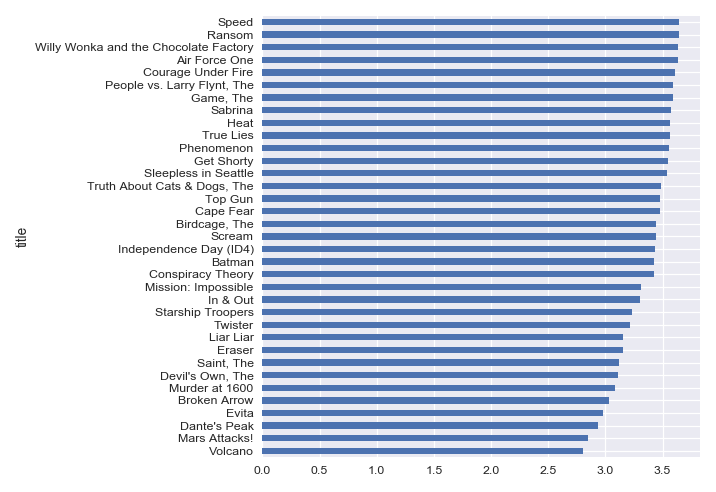

In [198]:
dff_1[dff_1['rating']['size']> 200]['rating']['mean'].sort_values(ascending = True).head(35).plot(kind = 'barh')

<IPython.core.display.Javascript object>


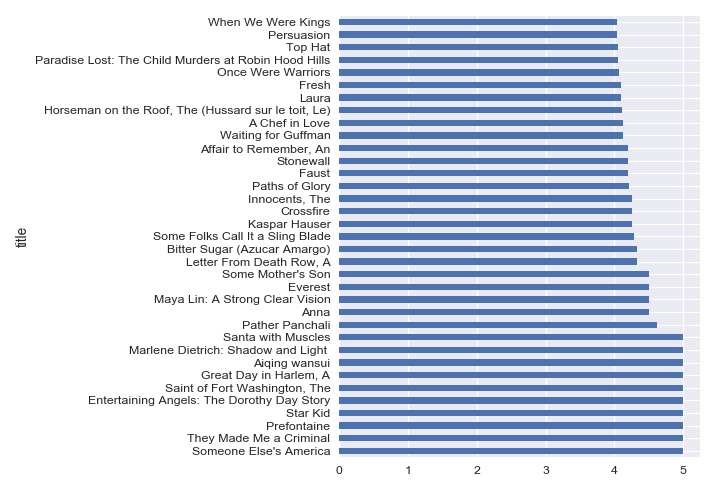

In [199]:
dff_1[dff_1['rating']['size'] < 50]['rating']['mean'].sort_values(ascending = False).head(35).plot(kind = 'barh')

<div class="alert alert-warning">
  <strong>genre</strong> 
</div>

In [110]:
# Dataframe with all genres
all_genres = zz.iloc[:, 6: ].drop(['timestamp', 'title', 'release_date', 'video_release_date', 'imdb_url'], axis = 1)

In [113]:
all_genres.head()

,rating,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1
2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,4,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [111]:
all_genres.shape

(100000, 20)

In [166]:
# Multiplying each genre with ratings 
result = all_genres.mul(all_genres['rating'], axis=0)

In [167]:
result = result.drop(['rating'], axis = 1)

In [168]:
result.describe()

,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.00032,0.890560,0.481840,0.128940,0.240830,1.01252,0.292580,0.027840,1.471080,0.043470,0.06796,0.174950,0.174450,0.190820,0.704820,0.453280,0.767490,0.358610,0.066990
std,0.03435,1.621767,1.277046,0.698498,0.918683,1.67361,1.037703,0.334703,1.930016,0.393449,0.52819,0.787406,0.803632,0.848678,1.513179,1.253799,1.540128,1.161664,0.507627
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.00000,1.000000,0.000000,0.000000,0.000000,2.00000,0.000000,0.000000,3.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.00000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


C:\Users\Nishu\Anaconda3\Lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


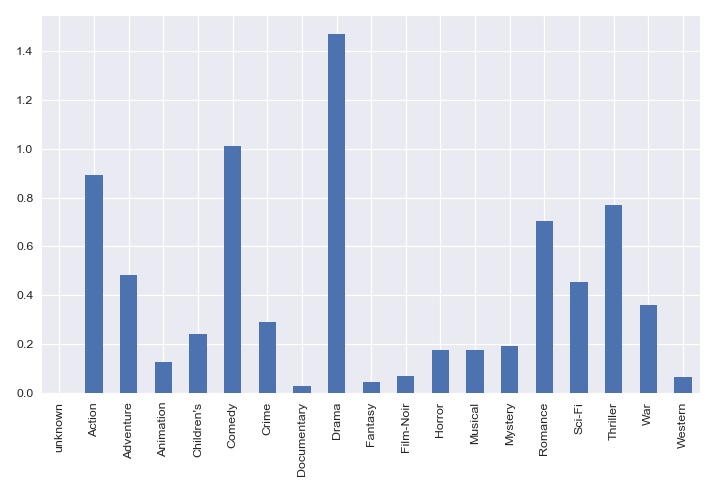

In [186]:
result.describe().ix['mean'].plot(kind='bar')

### Cumulative Density Function of Ratings per user

In [119]:
movies_per_user = zz.groupby(by='user_id')['rating'].count()

In [121]:
movies_per_user = movies_per_user.sort_values(ascending=False)
movies_per_user.head()

user_id
405    737
655    685
13     636
450    540
276    518
Name: rating, dtype: int64

<IPython.core.display.Javascript object>


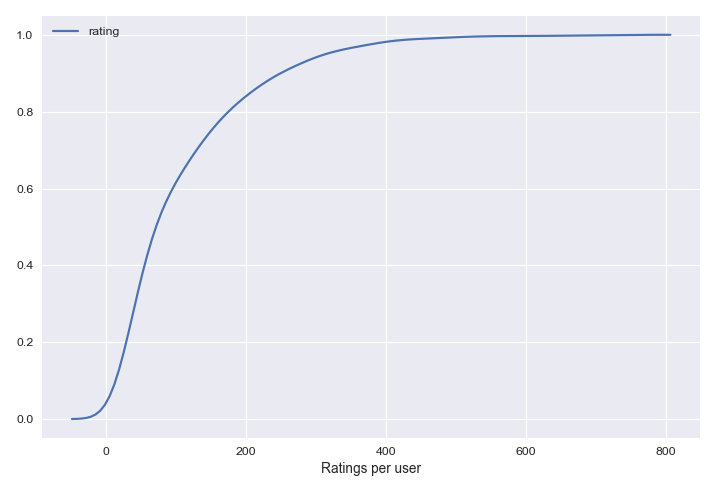

In [160]:
# Cumulative Density Function
sns.kdeplot(movies_per_user, cumulative = True)
plt.xlabel('Ratings per user')

** Interpretation:** 82% of the users have made less than 200 ratings while 18% of the users have rated more than 200 of them. 

## Analyzing the effect of Gender on ratings

In [200]:
zz.head()

,user_id,age,sex,occupation,zip_code,movie_id,rating,timestamp,title,release_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,24,M,technician,85711,242,5,889751633,Kolya,24-Jan-1997,NaN,http://us.imdb.com/M/title-exact?Kolya%20(1996),0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,24,M,technician,85711,51,4,878543275,Legends of the Fall,01-Jan-1994,NaN,http://us.imdb.com/M/title-exact?Legends%20of%...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1
2,1,24,M,technician,85711,265,4,878542441,"Hunt for Red October, The",01-Jan-1990,NaN,http://us.imdb.com/M/title-exact?Hunt+for+Red+...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,24,M,technician,85711,86,5,878543541,"Remains of the Day, The",01-Jan-1993,NaN,http://us.imdb.com/M/title-exact?Remains%20of%...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,1,24,M,technician,85711,257,4,874965954,Men in Black,04-Jul-1997,NaN,http://us.imdb.com/M/title-exact?Men+in+Black+...,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [201]:
gen = zz[['sex', 'title', 'rating']]

In [202]:
gen.head()

,sex,title,rating
0,M,Kolya,5
1,M,Legends of the Fall,4
2,M,"Hunt for Red October, The",4
3,M,"Remains of the Day, The",5
4,M,Men in Black,4


In [204]:
new_gen = gen.pivot_table(index = 'title', columns = 'sex', values = 'rating')

In [205]:
new_gen.head()

sex,F,M
title,,
,3.500000,3.428571
'Til There Was You,2.200000,2.500000
1-900,1.000000,3.000000
101 Dalmatians,3.116279,2.772727
12 Angry Men,4.269231,4.363636


In [206]:
new_gen['diff'] = new_gen['M'] - new_gen['F']

In [207]:
new_gen.head()

sex,F,M,diff
title,,,
,3.500000,3.428571,-0.071429
'Til There Was You,2.200000,2.500000,0.300000
1-900,1.000000,3.000000,2.000000
101 Dalmatians,3.116279,2.772727,-0.343552
12 Angry Men,4.269231,4.363636,0.094406


In [212]:
# Top 10 movies highly rated by Females but not by Males
new_gen.sort_values('diff').head(10)

sex,F,M,diff
title,,,
"Visitors, The (Visiteurs, Les)",5.0,2.000000,-3.000000
"Lay of the Land, The",4.0,1.000000,-3.000000
Love and Death on Long Island,4.0,1.000000,-3.000000
Rough Magic,4.0,1.000000,-3.000000
Loch Ness,4.0,1.000000,-3.000000
Faster Pussycat! Kill! Kill!,5.0,2.666667,-2.333333
Chairman of the Board,4.0,1.714286,-2.285714
Two Much,4.0,1.800000,-2.200000
"Simple Wish, A",3.0,1.000000,-2.000000


<IPython.core.display.Javascript object>


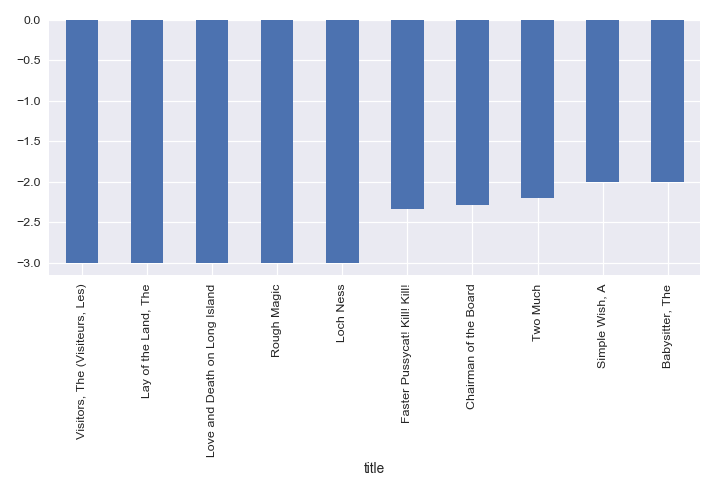

In [215]:
new_gen.sort_values('diff').head(10)['diff'].plot(kind='bar')

In [213]:
# Top 10 movies highly rated by Males but not by Females 
new_gen.sort_values('diff', ascending=False).head(10)

sex,F,M,diff
title,,,
Delta of Venus,1.0,5.000000,4.000000
Two or Three Things I Know About Her,1.0,4.666667,3.666667
Paths of Glory,1.0,4.419355,3.419355
"Magic Hour, The",1.0,4.250000,3.250000
Killer (Bulletproof Heart),1.0,4.000000,3.000000
Spirits of the Dead (Tre passi nel delirio),1.0,4.000000,3.000000
Aparajito,1.0,4.000000,3.000000
Little City,2.0,5.000000,3.000000
So Dear to My Heart,1.0,4.000000,3.000000


<IPython.core.display.Javascript object>


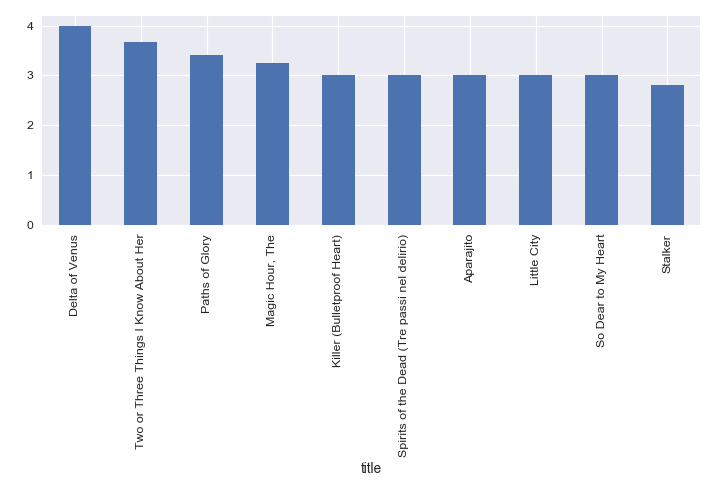

In [216]:
new_gen.sort_values('diff', ascending=False).head(10)['diff'].plot(kind = 'bar')

In [218]:
all_genres.head()

,rating,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1
2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,5,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,4,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0


In [219]:
all_genres.columns

Index(['rating', 'unknown', 'Action', 'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'], dtype='object')

In [225]:
genre_count = pd.DataFrame(columns=['col','entries'])

In [230]:
col_list = []

In [236]:
list((all_genres.columns))

['rating',
 'unknown',
 'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western']

In [265]:
genre_sum = list()

In [266]:
for col in list((all_genres.columns)):
    genre_sum.append(all_genres[col].sum())

In [267]:
genres = list((all_genres.columns))

In [268]:
genre_df = pd.DataFrame({'genres': genres, 'entries': genre_sum})

In [269]:
genre_df.head()

,entries,genres
0,352986,rating
1,10,unknown
2,25589,Action
3,13753,Adventure
4,3605,Animation


<IPython.core.display.Javascript object>


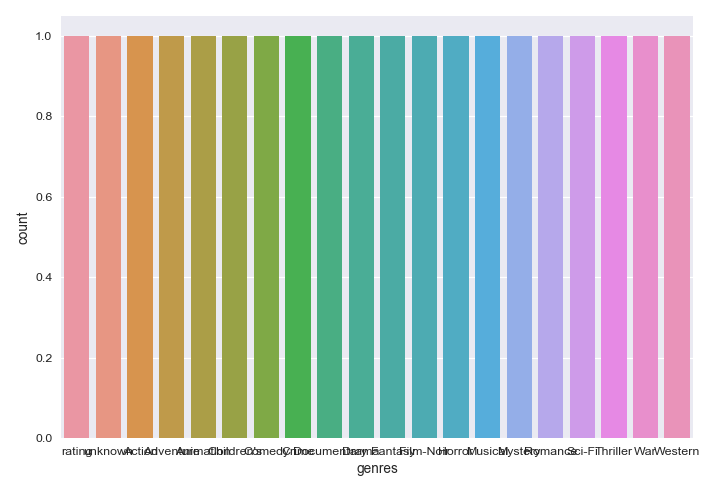

In [271]:
sns.countplot(x="genres", data=genre_df)

<IPython.core.display.Javascript object>


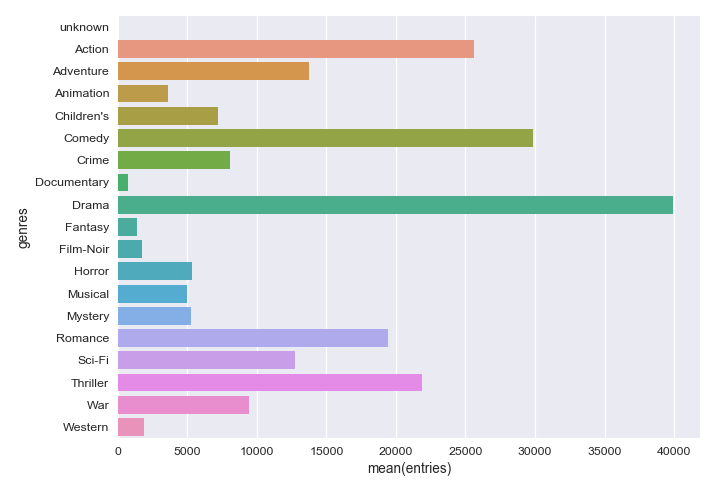

In [287]:
sns.barplot(y='genres', x='entries', data = genre_df.iloc[1:])